In [35]:
# install numpy
# install pandas
# install matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor

In [36]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')
df = pd.concat([df_train,df_test], ignore_index= True)
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [37]:
df.drop(columns=['Unnamed: 0','id'], inplace=True)

In [38]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


**<span style="font-size:30px">Missing Data</span>**

In [39]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [40]:
(df.isnull().sum()/df.shape[0])*100

Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minutes           0.000000
Arrival Delay in Minutes          

In [41]:
from warnings import filterwarnings
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(),inplace = True)
filterwarnings("ignore")

Duplicate Value

In [42]:
df.duplicated().sum()

np.int64(0)

Garbage value

In [43]:
for column in df.select_dtypes(include=['object']).columns:
    print(df[column].value_counts())
    print('...'*10)

Gender
Female    65899
Male      63981
Name: count, dtype: int64
..............................
Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64
..............................
Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64
..............................
Class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64
..............................
satisfaction
neutral or dissatisfied    73452
satisfied                  56428
Name: count, dtype: int64
..............................


**<span style="font-size:30px">Exploratory Data Analysis </span>**

In [44]:
df.select_dtypes(include= 'number').describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.0,844.0,1744.0,4983.0
Inflight wifi service,129880.0,2.728696,1.329340,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,3.057599,1.526741,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,129880.0,2.756876,1.401740,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.976925,1.278520,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,3.204774,1.329933,0.0,2.0,3.0,4.0,5.0
Online boarding,129880.0,3.252633,1.350719,0.0,2.0,3.0,4.0,5.0
Seat comfort,129880.0,3.441361,1.319289,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,129880.0,3.358077,1.334049,0.0,2.0,4.0,4.0,5.0


In [45]:
df.select_dtypes(include = 'object').describe().T

,count,unique,top,freq
Gender,129880,2,Female,65899
Customer Type,129880,2,Loyal Customer,106100
Type of Travel,129880,2,Business travel,89693
Class,129880,3,Business,62160
satisfaction,129880,2,neutral or dissatisfied,73452


In [46]:
sns.set_theme()

In [47]:
n_column =  df.select_dtypes(include= 'number')

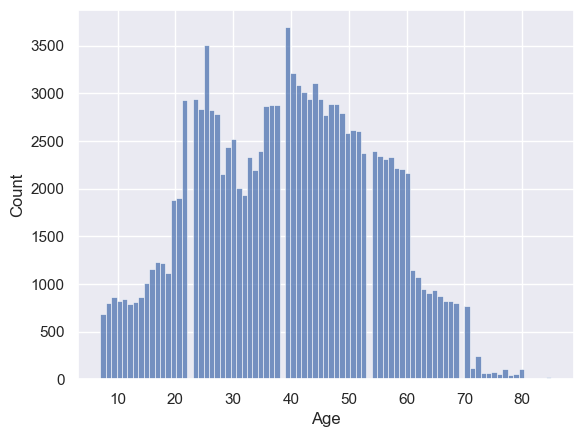

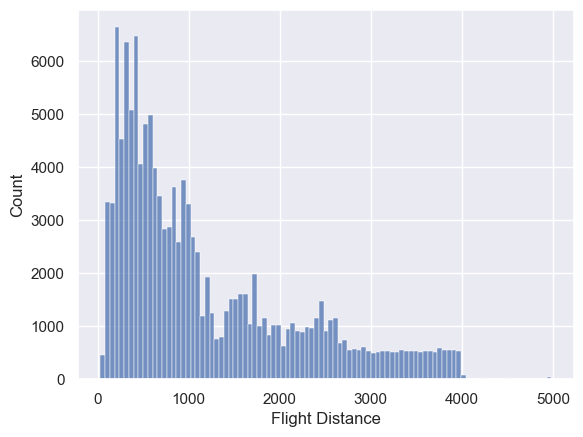

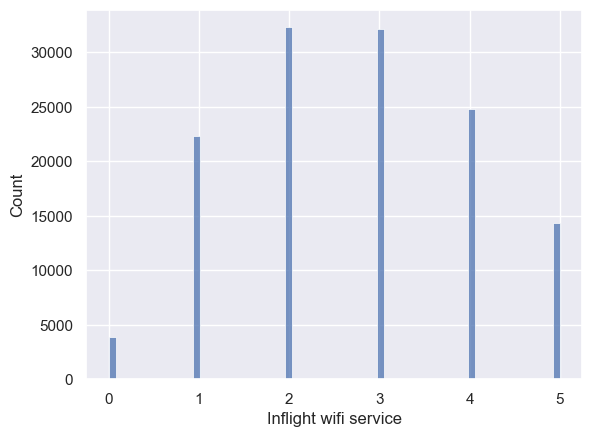

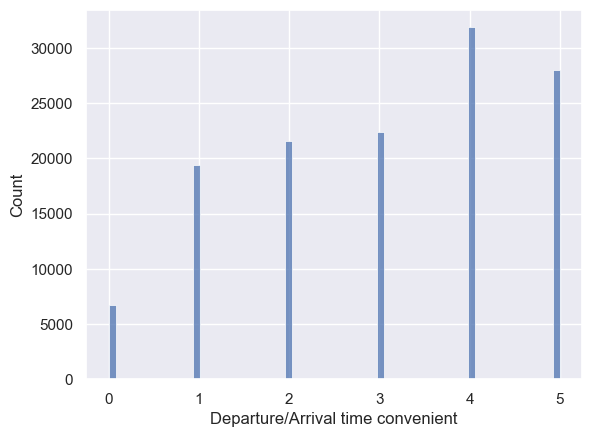

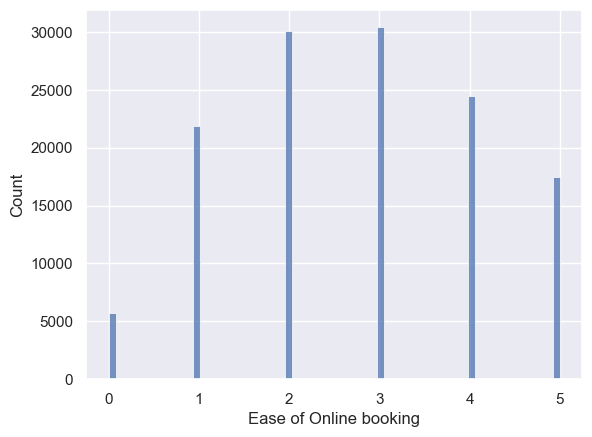

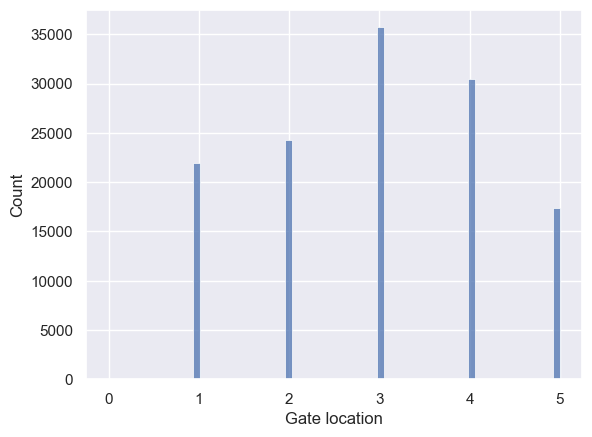

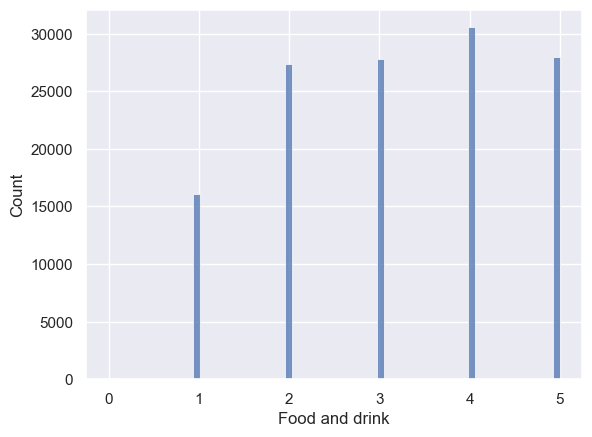

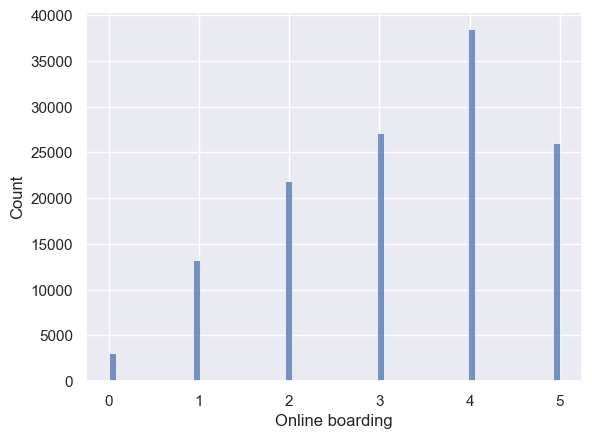

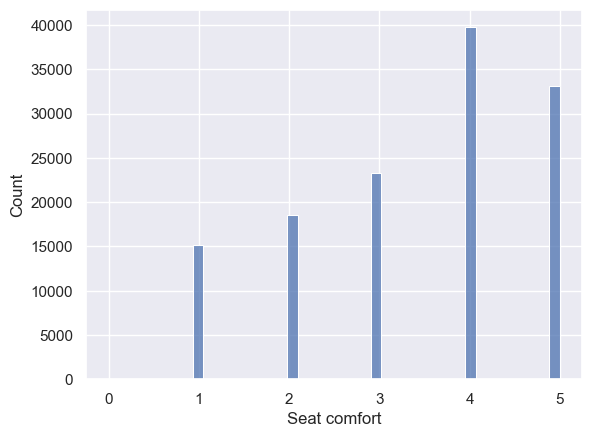

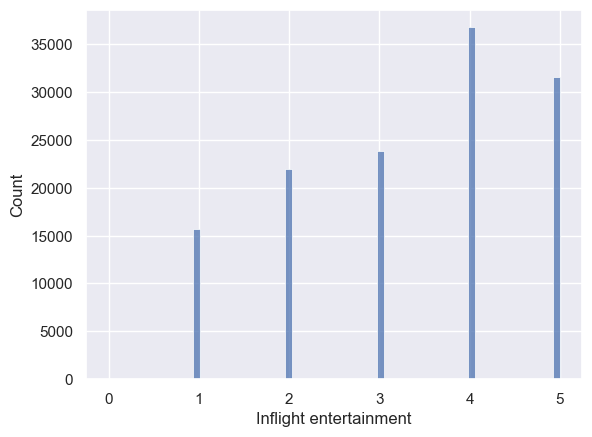

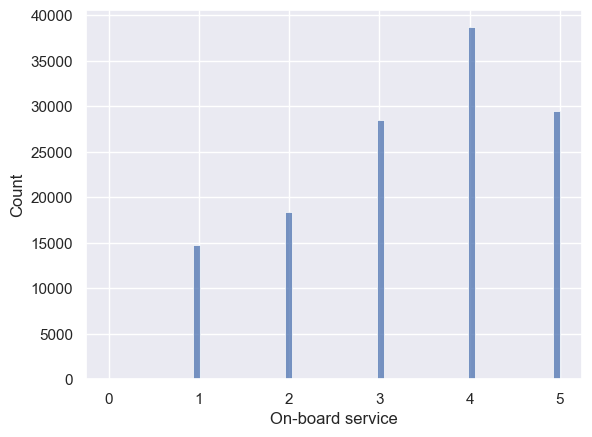

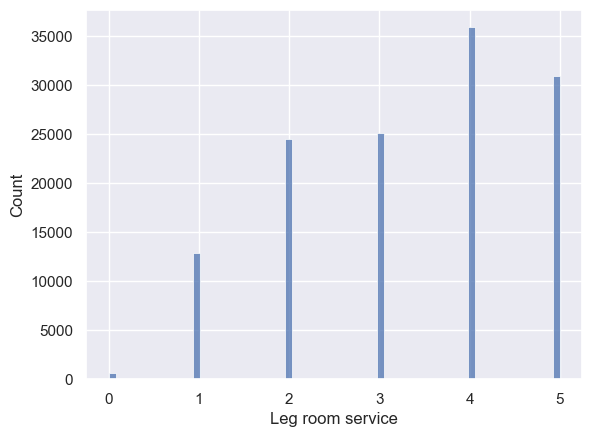

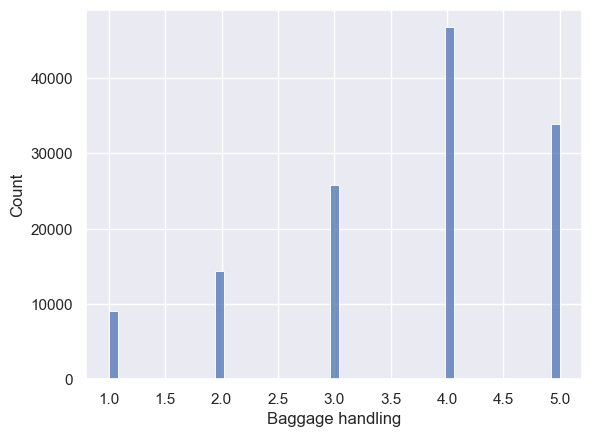

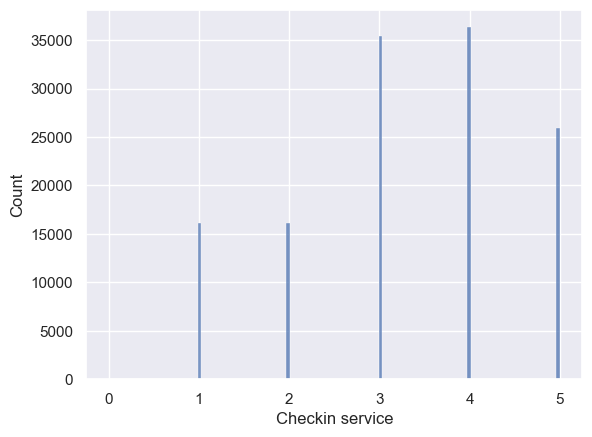

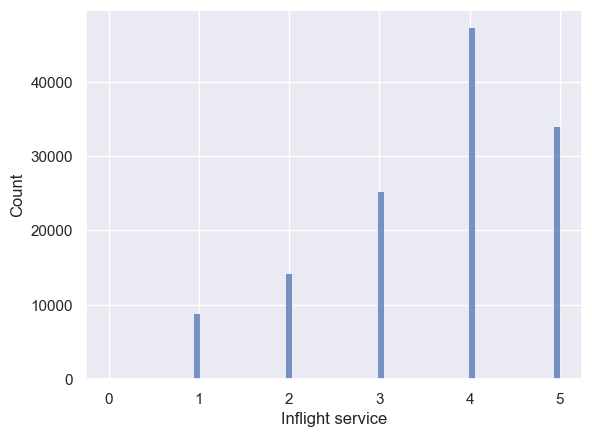

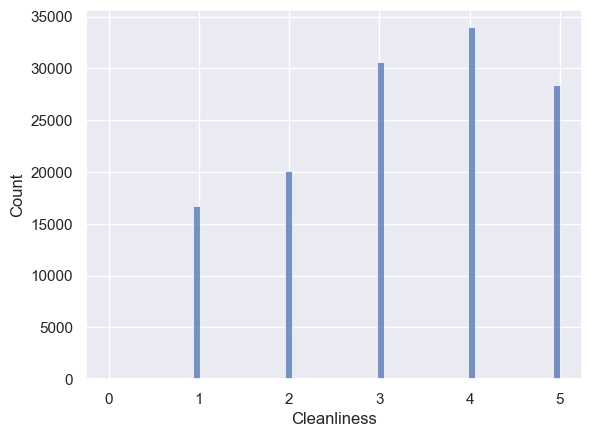

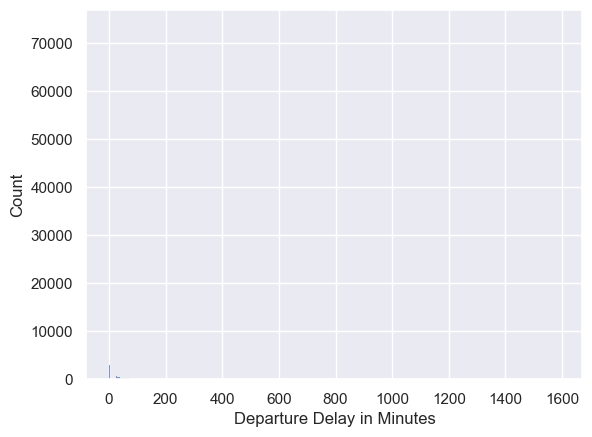

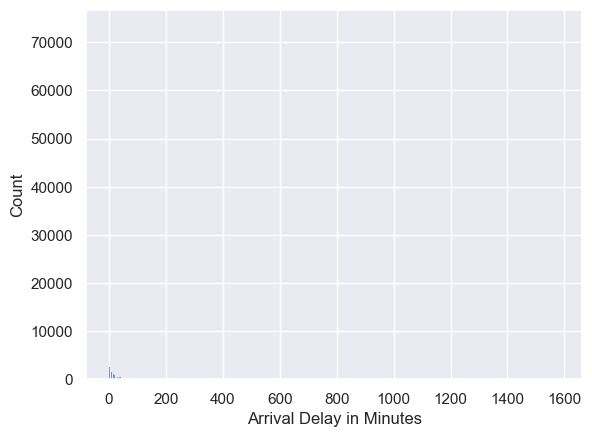

In [48]:
# truc quan du lieu
for column in n_column.columns:
    sns.histplot(df, x = column)
    plt.show()

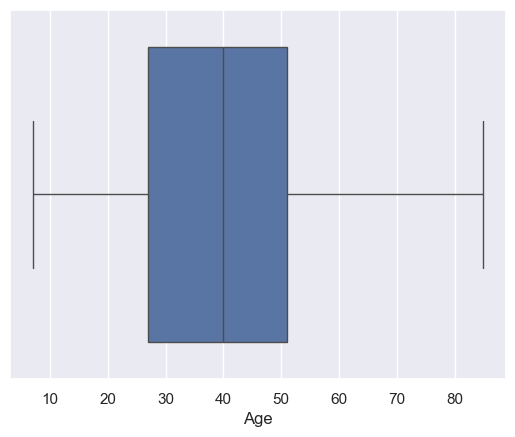

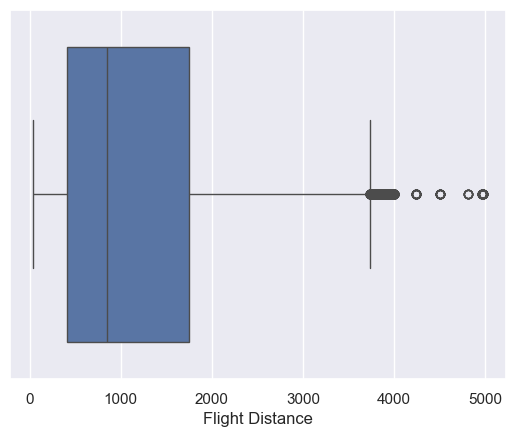

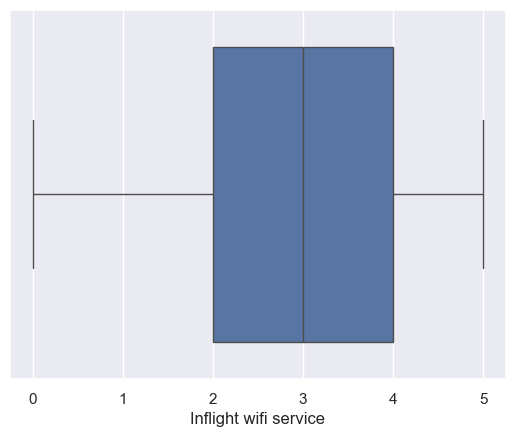

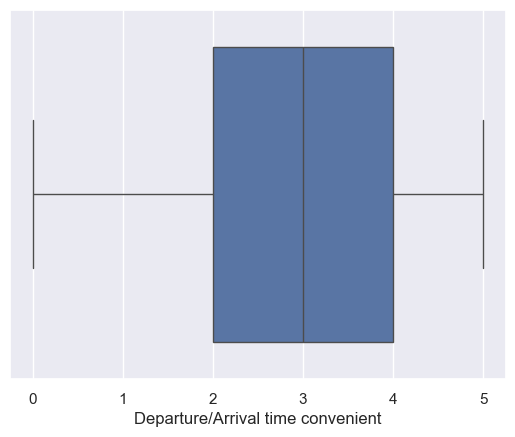

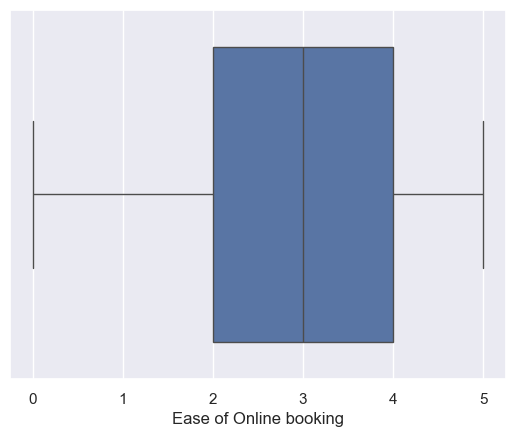

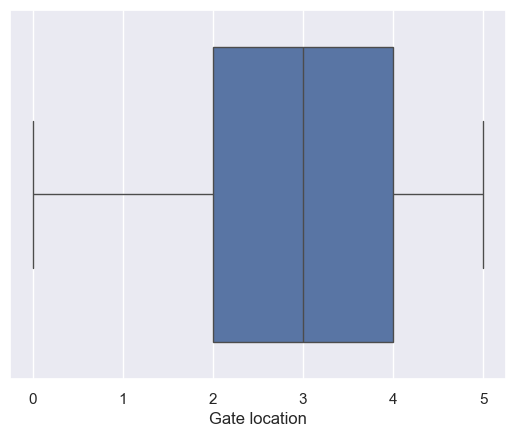

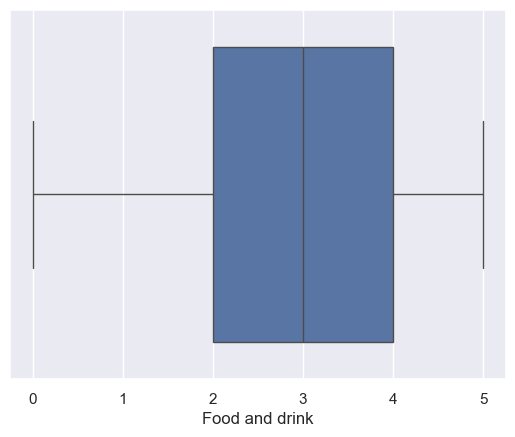

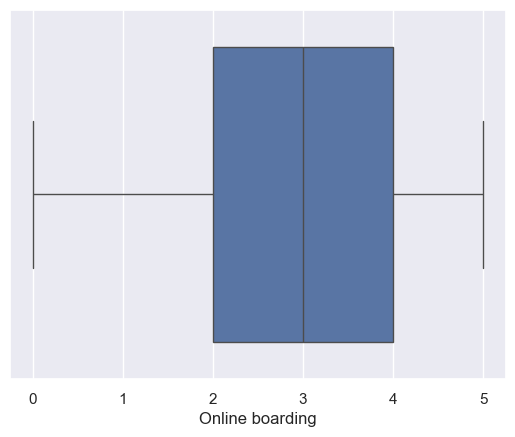

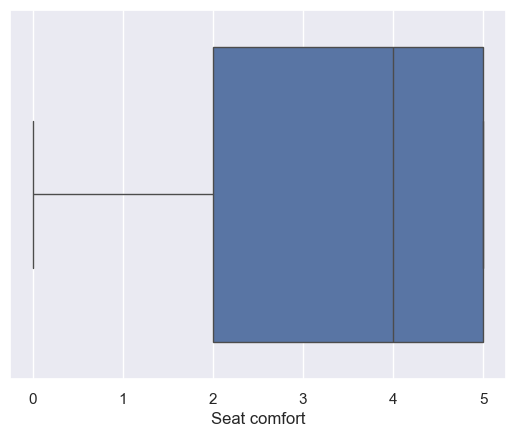

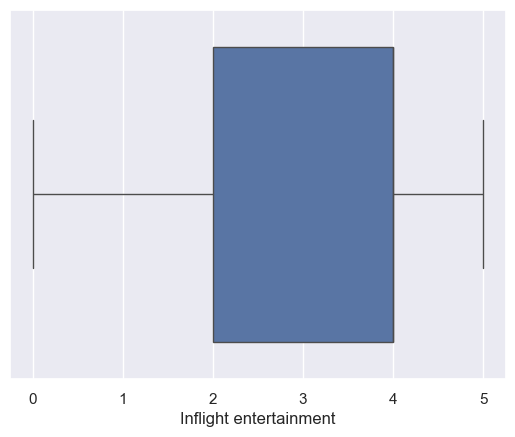

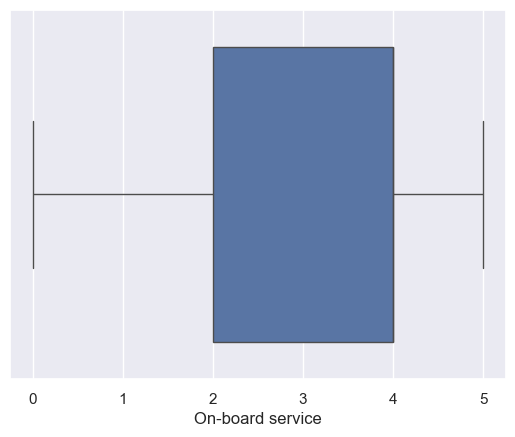

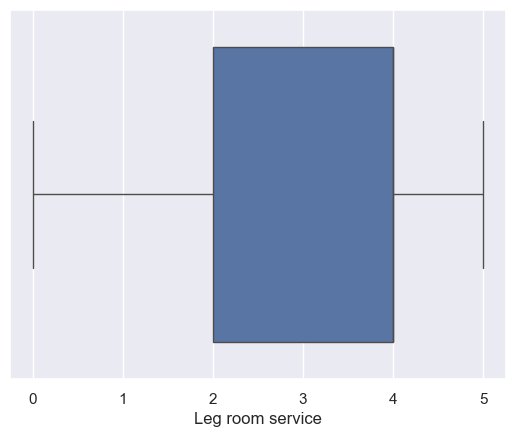

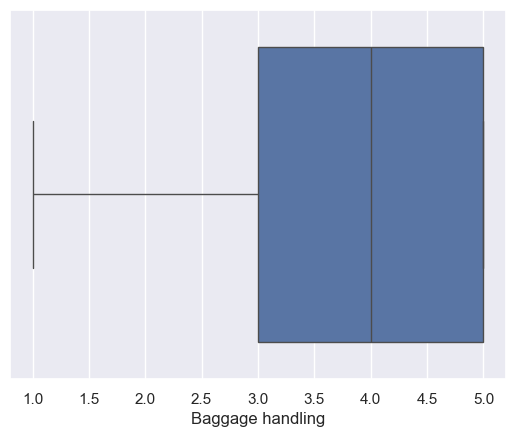

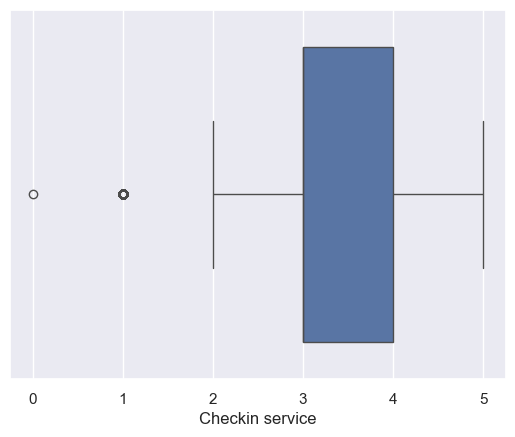

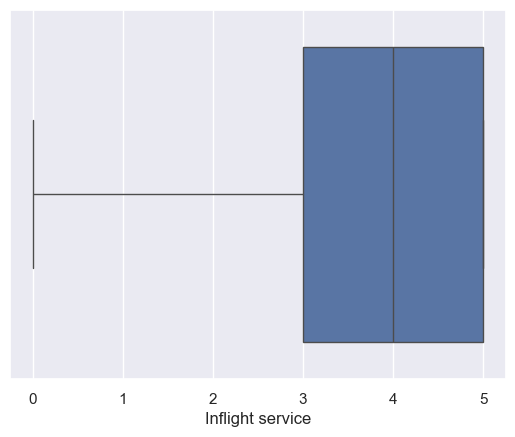

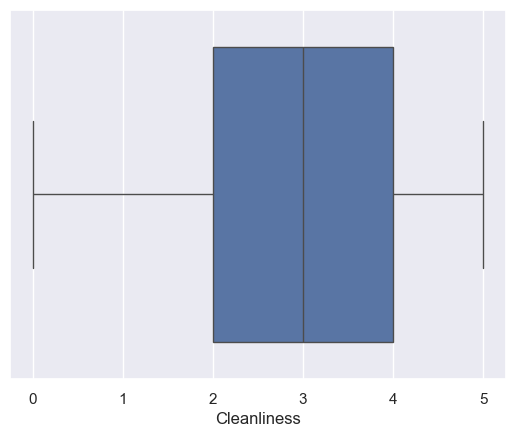

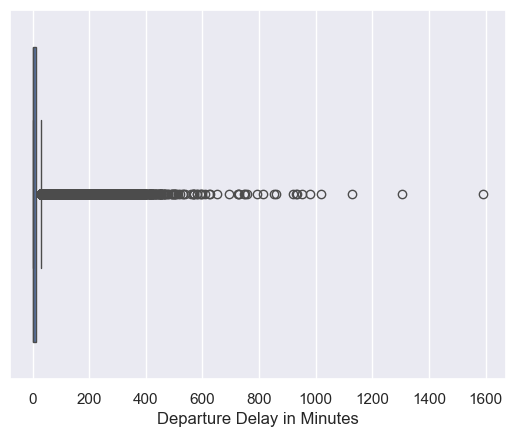

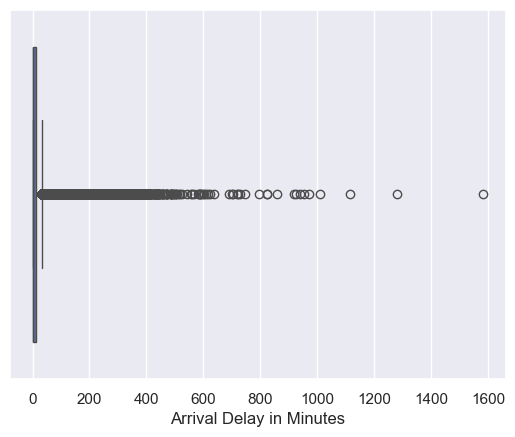

In [49]:
for column in n_column.columns:
    sns.boxplot(data=df, x = column)
    plt.show()

In [50]:
n_column.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [51]:
for i in df.select_dtypes(include = 'object').columns:
    df[i] = df[i].astype('category')
df.dtypes

Gender                               category
Customer Type                        category
Age                                     int64
Type of Travel                       category
Class                                category
Flight Distance                         int64
Inflight wifi service                   int64
Departure/Arrival time convenient       int64
Ease of Online booking                  int64
Gate location                           int64
Food and drink                          int64
Online boarding                         int64
Seat comfort                            int64
Inflight entertainment                  int64
On-board service                        int64
Leg room service                        int64
Baggage handling                        int64
Checkin service                         int64
Inflight service                        int64
Cleanliness                             int64
Departure Delay in Minutes              int64
Arrival Delay in Minutes          

In [52]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

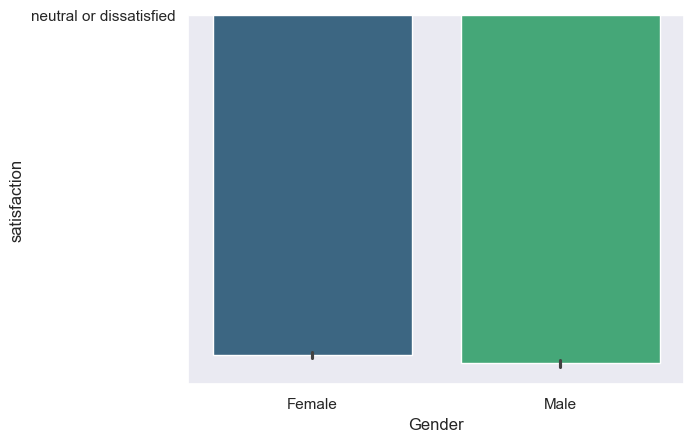

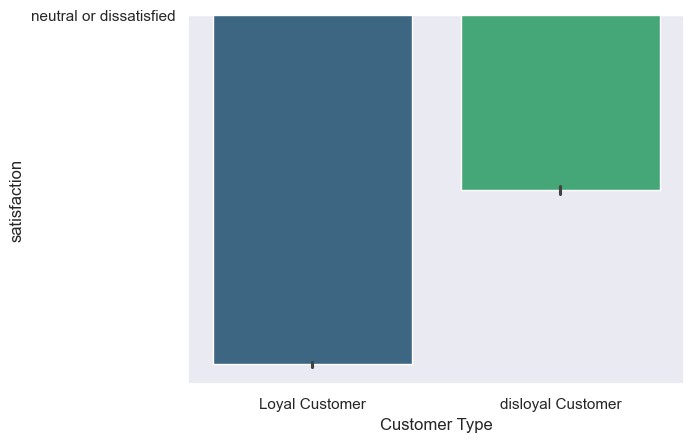

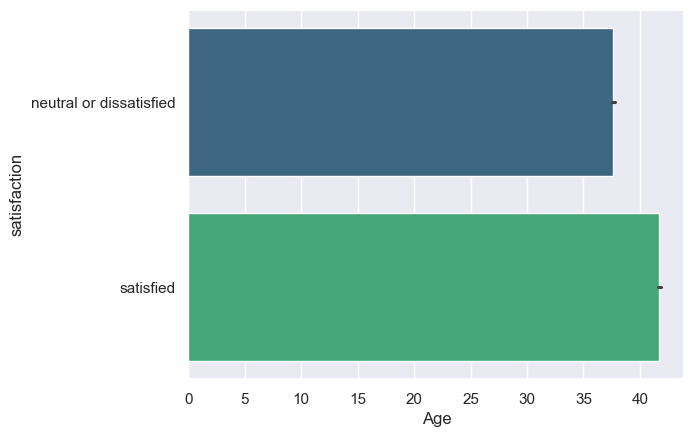

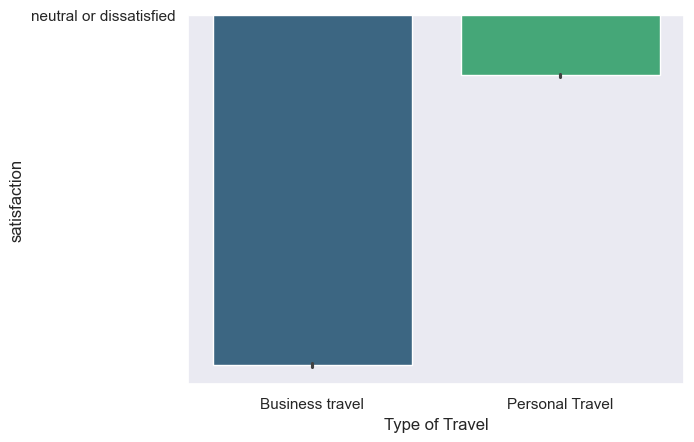

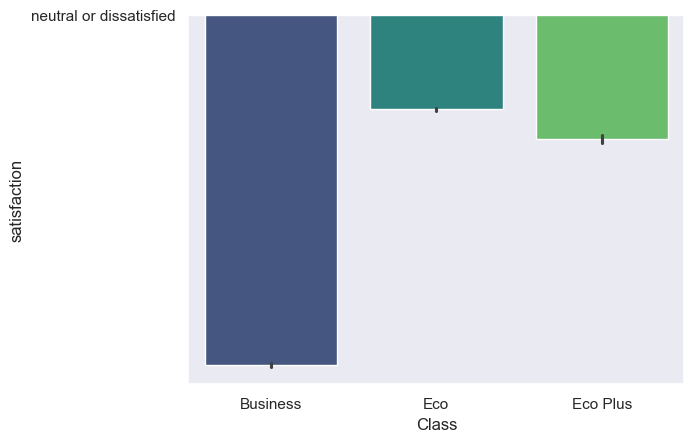

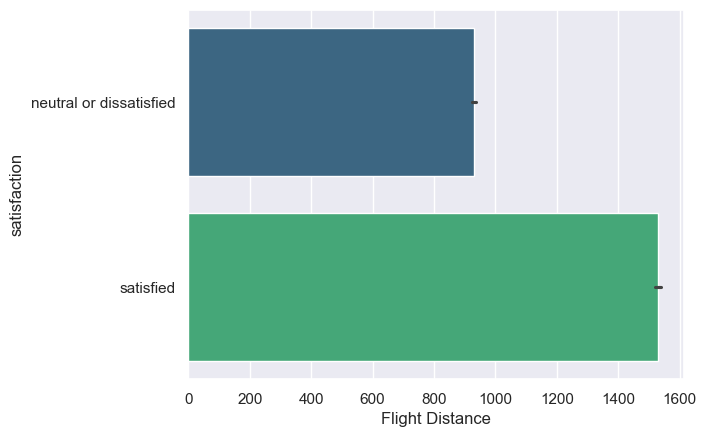

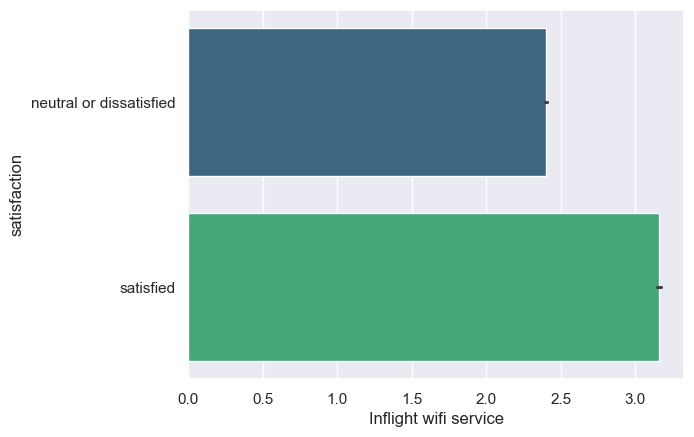

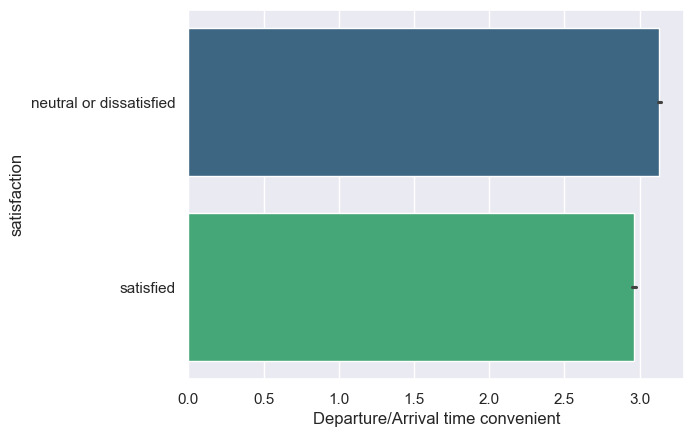

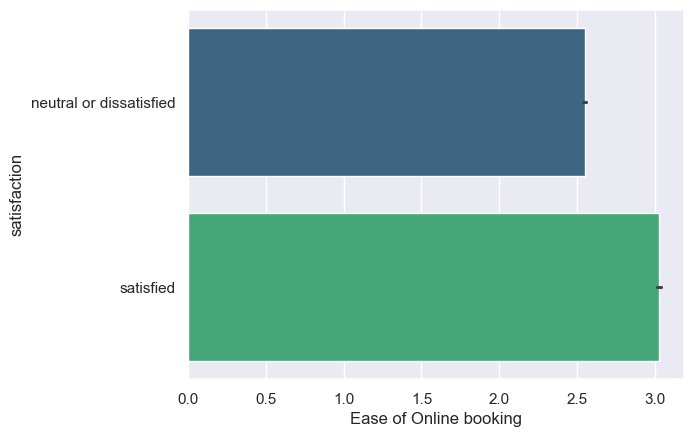

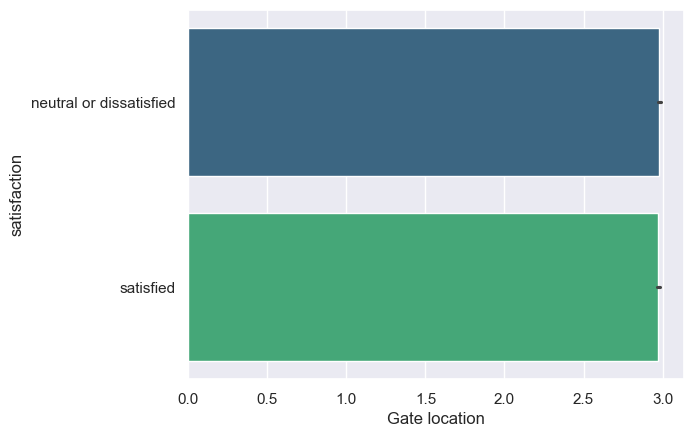

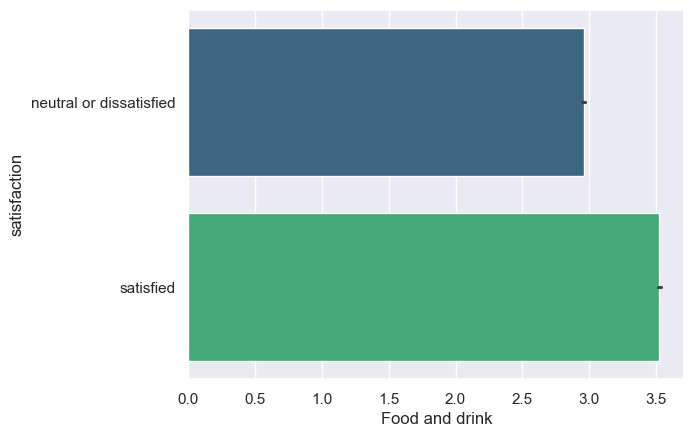

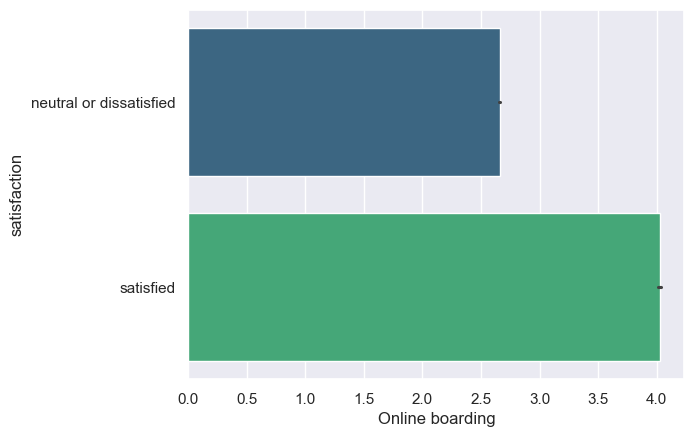

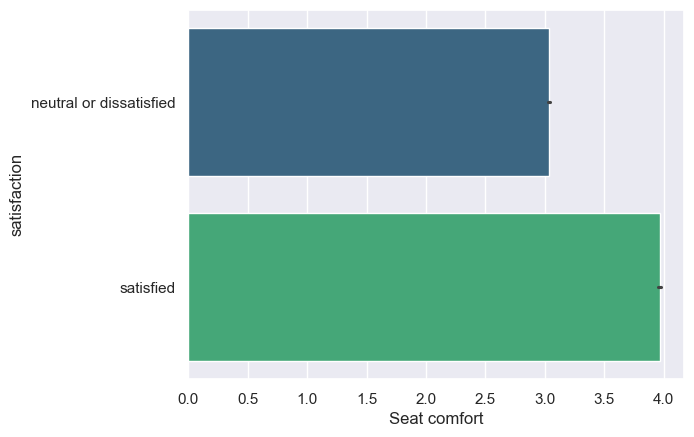

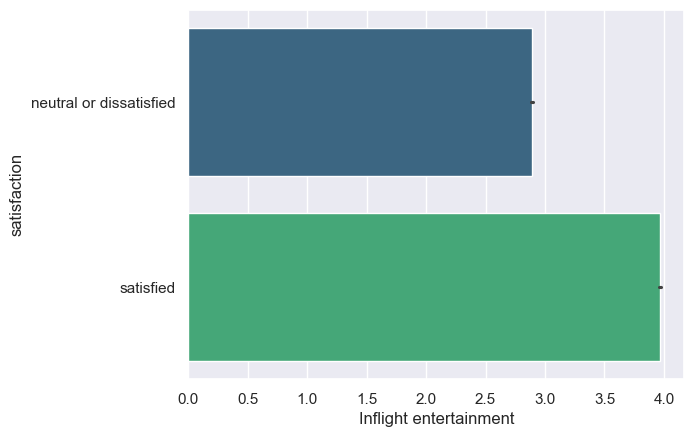

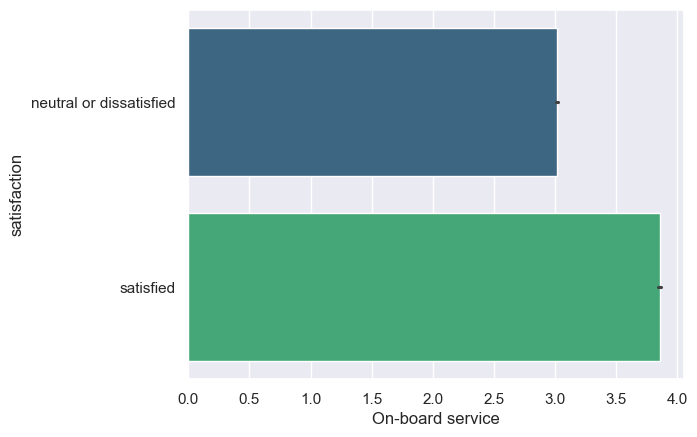

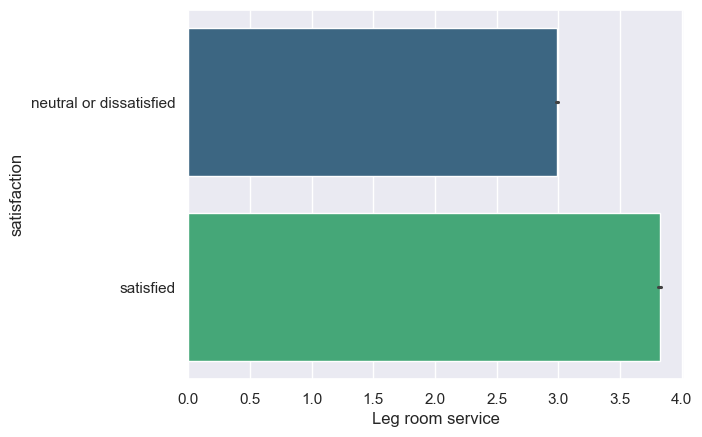

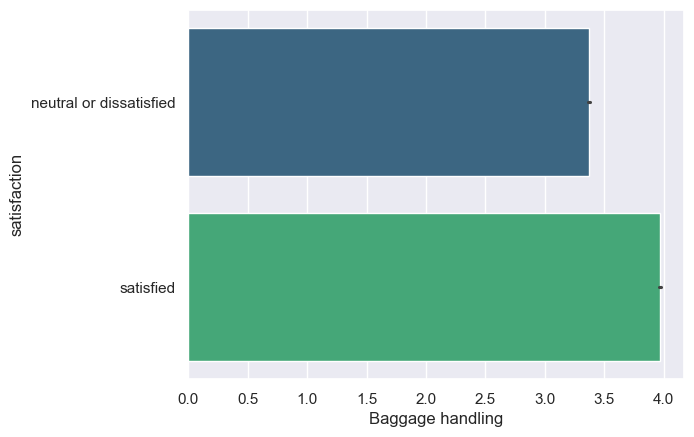

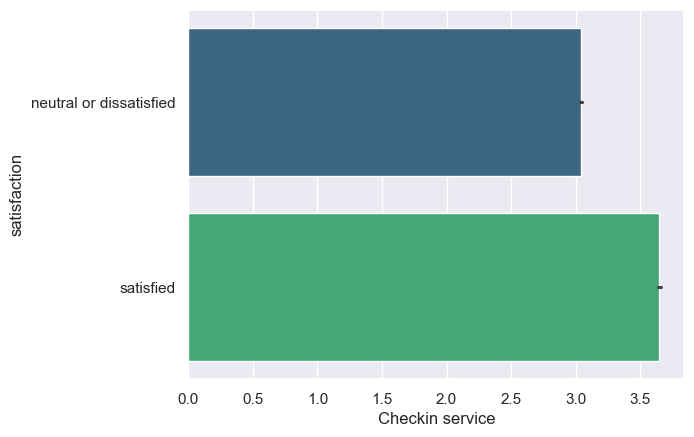

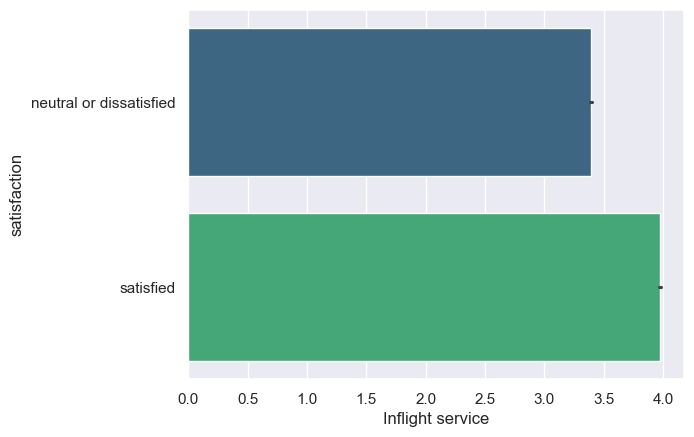

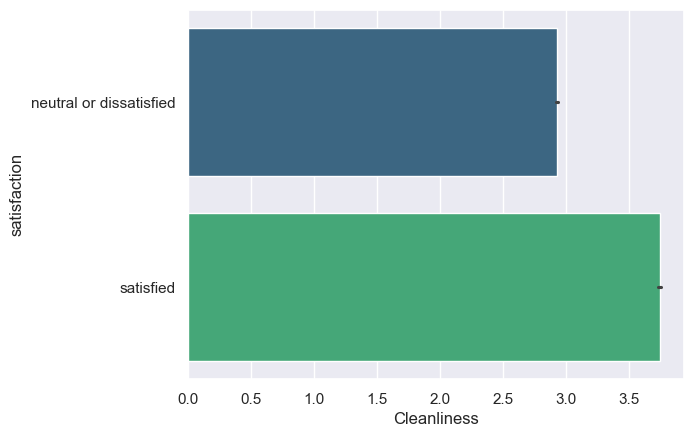

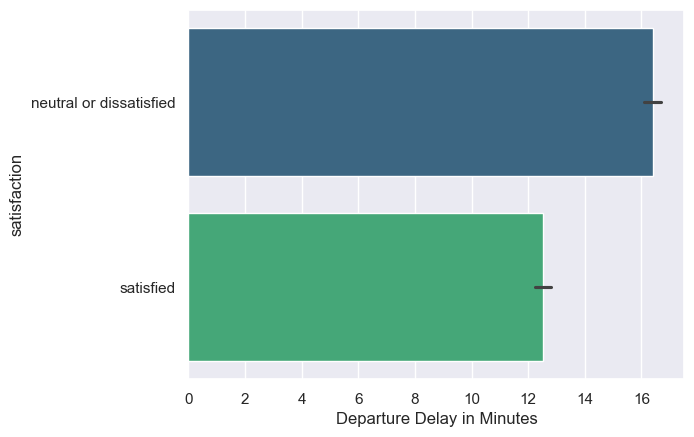

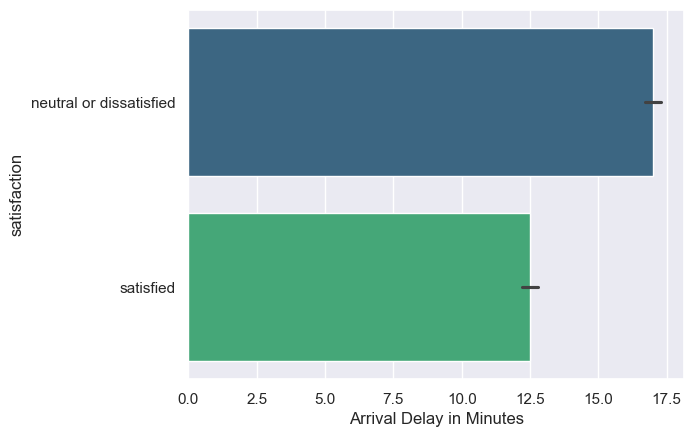

In [53]:
# Bar plot show relationship
from warnings import filterwarnings
for column in ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']:
    filterwarnings('ignore')
    sns.barplot(data = df, x = column, y = 'satisfaction',estimator=np.mean, palette = 'viridis')
    plt.show()


In [54]:
n = n_column.corr()

<Axes: >

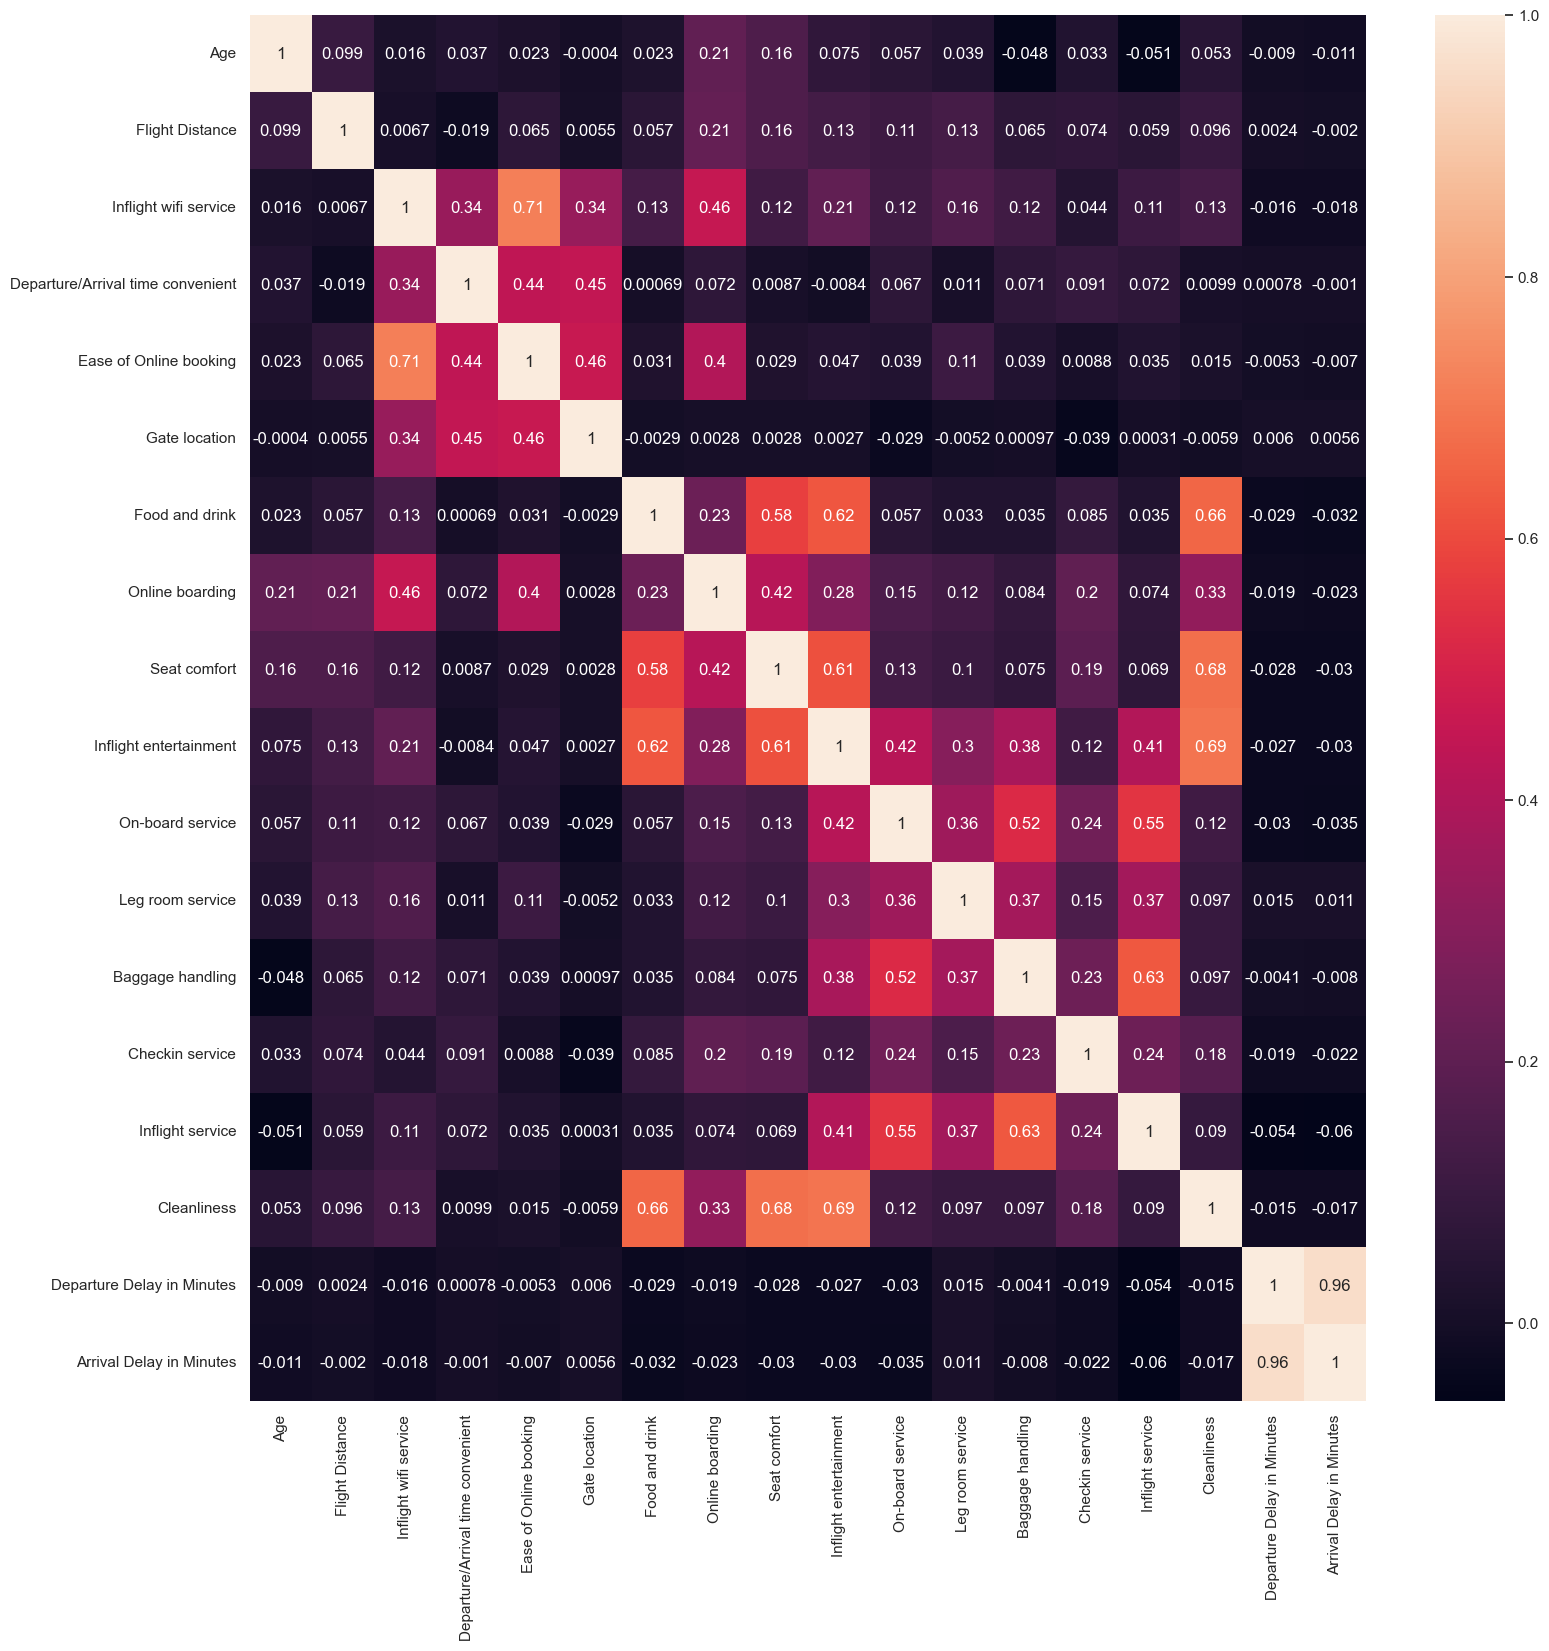

In [55]:
# Interpret relation
plt.figure(figsize=(18,18))
sns.heatmap(n, annot=True)

In [56]:
for i in df.select_dtypes(include = 'category').columns:
    df[i] = df[i].astype('object')

In [57]:
df.tail(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied
129879,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,2,5,...,1,1,2,1,1,1,1,0,0.0,neutral or dissatisfied


**<span style="font-size:24px">Outlier handling</span>**

In [58]:
for i in ['Flight Distance', 'Checkin service','On-board service']:
    G1 = df[i].quantile(0.25)
    G3 = df[i].quantile(0.75)
    IQR = G3 - G1
    lw = G1 - 1.5*IQR
    uw = G3 + 1.5*IQR
    df = df[(df[i] > lw) & (df[i] < uw)]

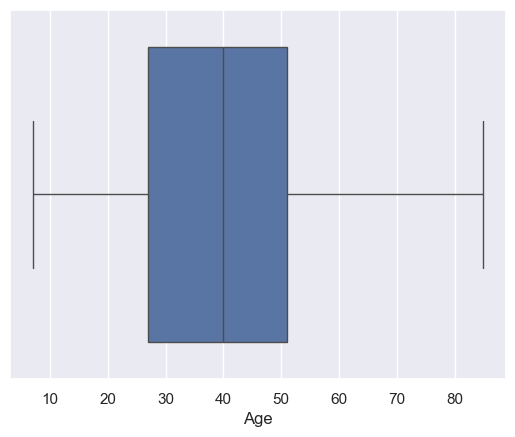

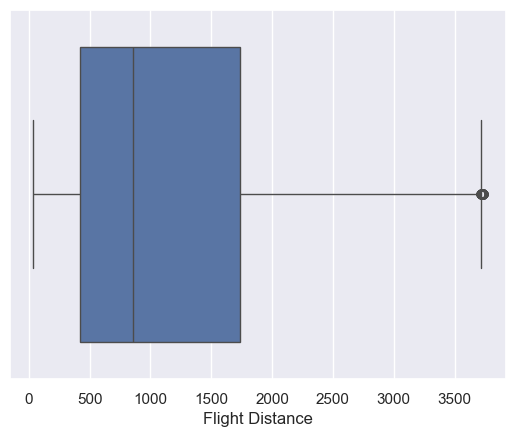

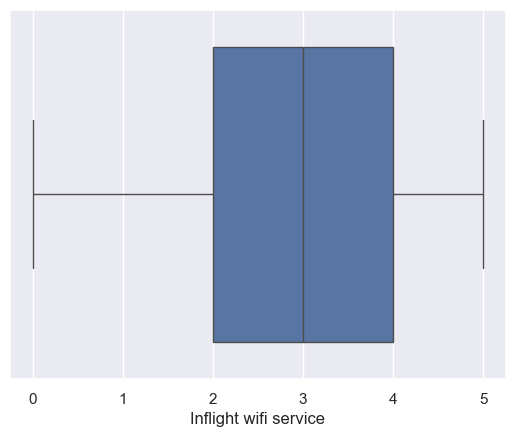

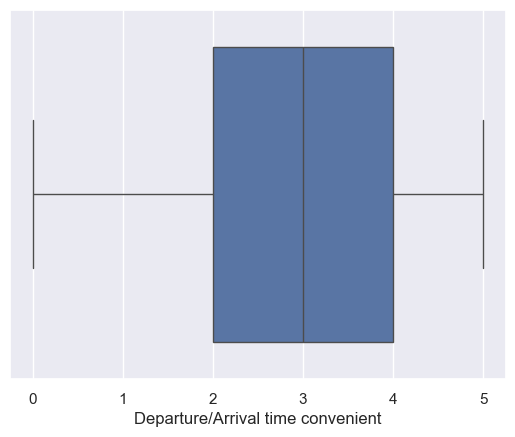

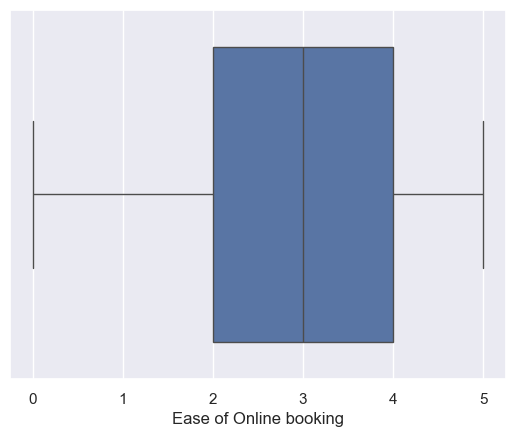

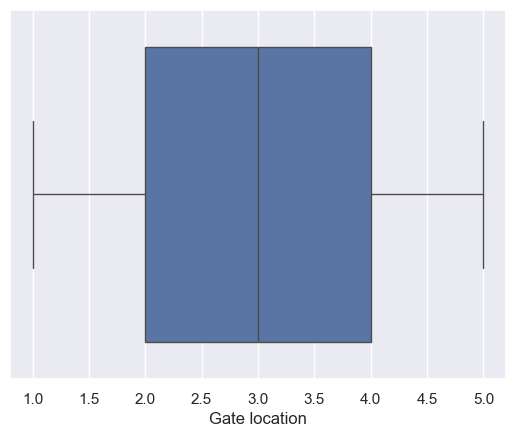

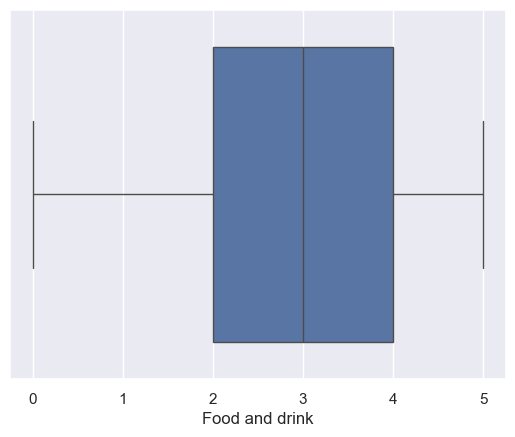

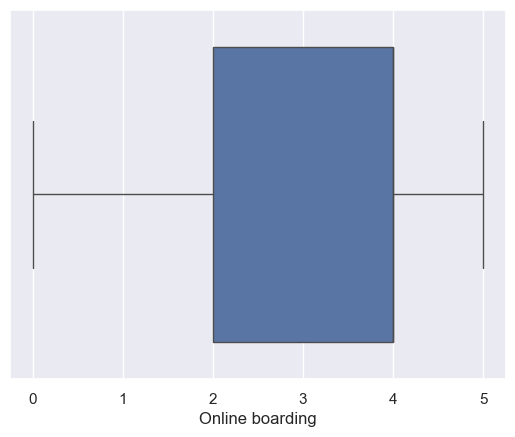

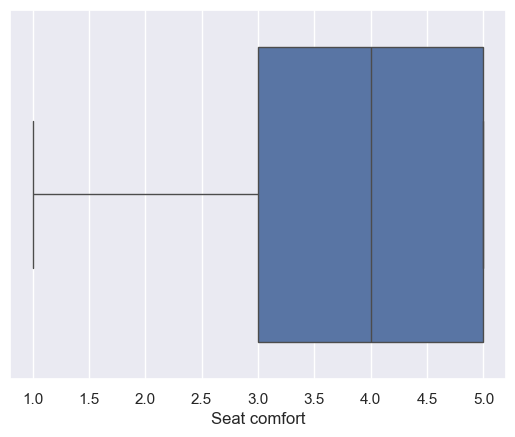

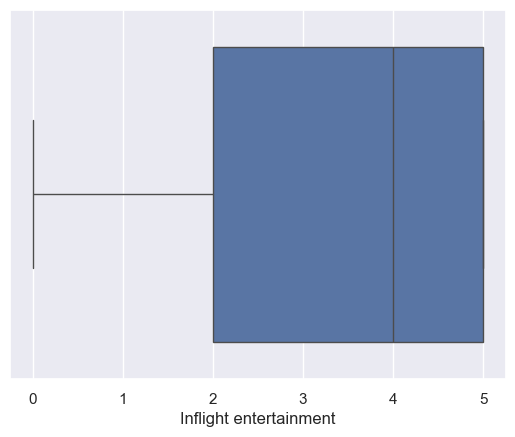

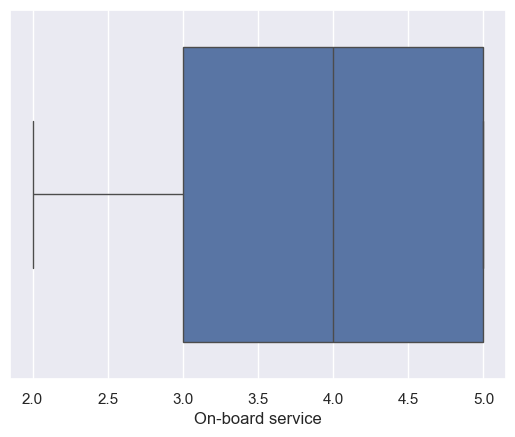

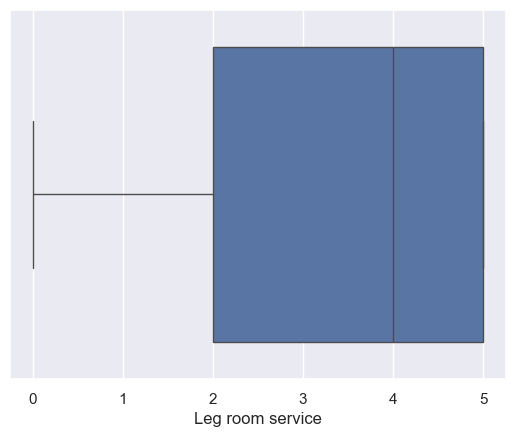

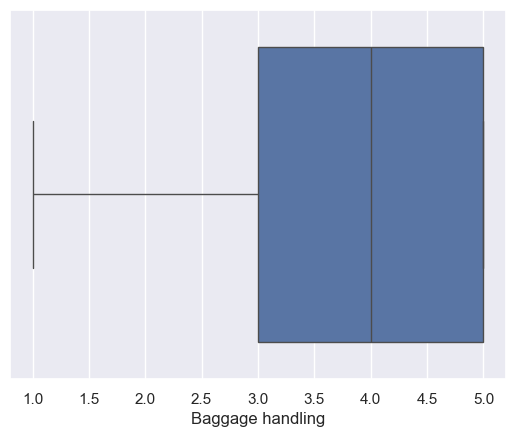

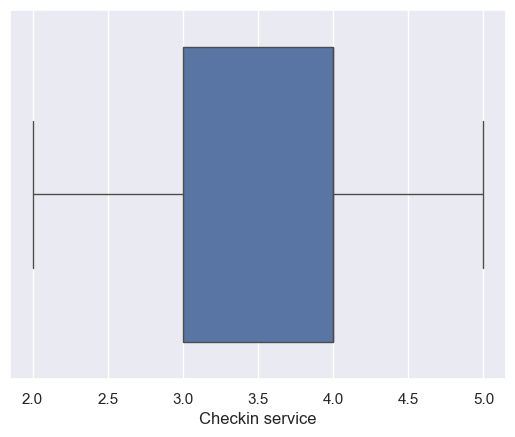

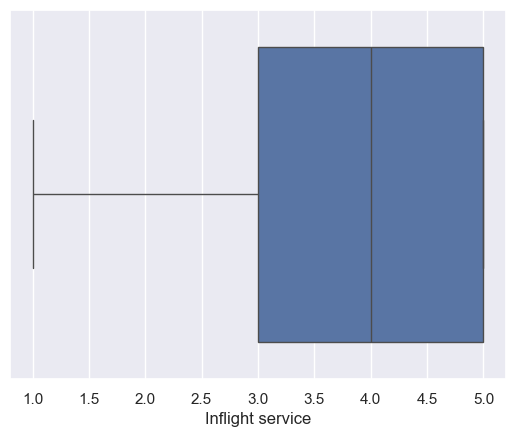

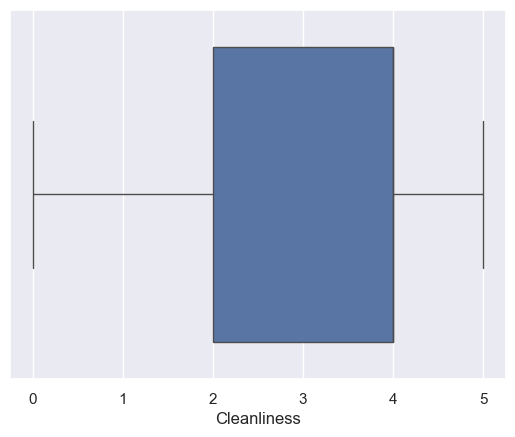

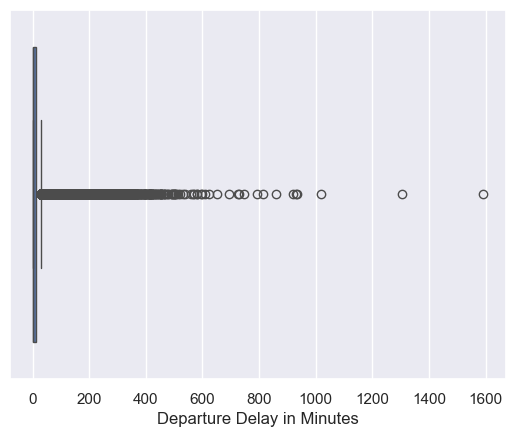

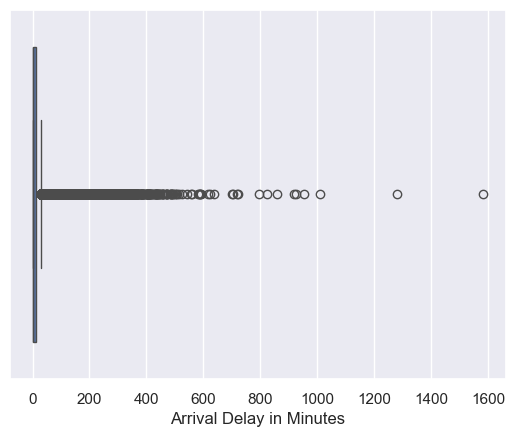

In [59]:
for column in n_column.columns:
    sns.boxplot(data = df, x = column)
    plt.show()

**<span style="font-size:30px">Encoding Data</span>**

In [60]:
df.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [61]:
dum = pd.get_dummies(data = df,columns = ['Gender','Customer Type', 'Type of Travel', 'Class','satisfaction'],drop_first = True)
dum

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,13,460,3,4,3,1,5,3,5,5,...,5,5,25,18.0,True,False,True,False,True,False
2,26,1142,2,2,2,2,5,5,5,5,...,4,5,0,0.0,False,False,False,False,False,True
4,61,214,3,3,3,3,4,5,5,3,...,3,3,0,0.0,True,False,False,False,False,True
5,26,1180,3,4,2,1,1,2,1,1,...,4,1,0,0.0,False,False,True,True,False,False
6,47,1276,2,4,2,3,2,2,2,2,...,5,2,9,23.0,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,36,432,1,5,1,3,4,1,4,4,...,3,4,0,0.0,False,True,False,True,False,False
129875,34,526,3,3,3,1,4,3,4,4,...,5,4,0,0.0,True,True,False,False,False,False
129876,23,646,4,4,4,4,4,4,4,4,...,5,4,0,0.0,True,False,False,False,False,True
129877,17,828,2,5,1,5,2,1,2,2,...,4,2,0,0.0,False,False,True,True,False,False


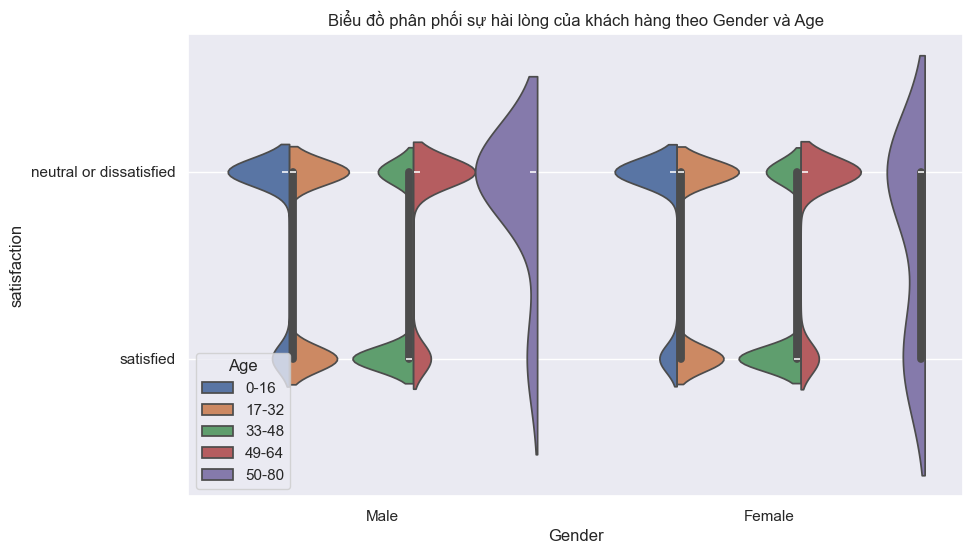

In [62]:
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-16', '17-32', '33-48', '49-64', '50-80']
df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='satisfaction', hue='Age', data=df, split=True)
plt.title('Biểu đồ phân phối sự hài lòng của khách hàng theo Gender và Age')
plt.show()

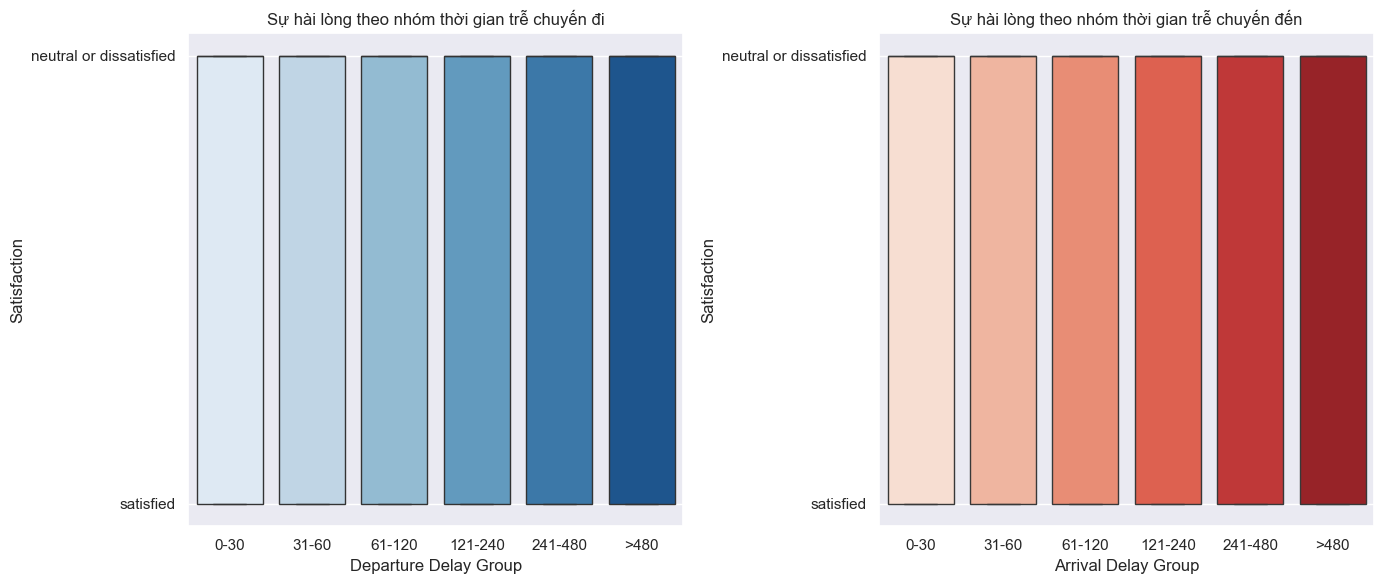

In [67]:
bins = [0, 40, 80, 160, 320, 600, 1500]
labels = ['0-30', '31-60', '61-120', '121-240', '241-480', '>480']
df['Departure Delay Group'] = pd.cut(df['Departure Delay in Minutes'], bins=bins, labels=labels)
df['Arrival Delay Group'] = pd.cut(df['Arrival Delay in Minutes'], bins=bins, labels=labels)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='Departure Delay Group', y='satisfaction', data=df, ax=ax[0], palette='Blues')
ax[0].set_title('Sự hài lòng theo nhóm thời gian trễ chuyến đi')
ax[0].set_xlabel('Departure Delay Group')
ax[0].set_ylabel('Satisfaction')

sns.boxplot(x='Arrival Delay Group', y='satisfaction', data=df, ax=ax[1], palette='Reds')
ax[1].set_title('Sự hài lòng theo nhóm thời gian trễ chuyến đến')
ax[1].set_xlabel('Arrival Delay Group')
ax[1].set_ylabel('Satisfaction')

plt.tight_layout()
plt.show()